  df = df.applymap(lambda x: np.nan if 10 <= x <= 60 else x)



Rows with missing values: 100


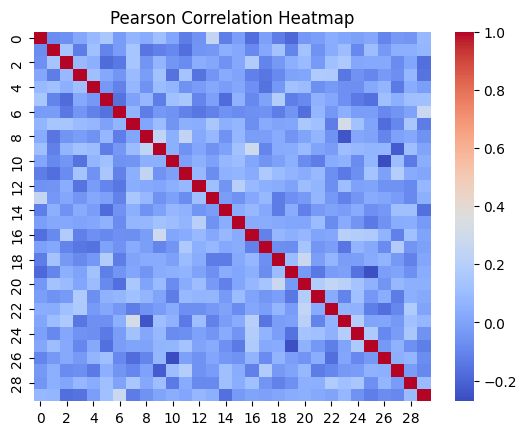

  df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)



Columns with correlation ≤ 0.7:
 Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
      dtype='int64')


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Step 1: Create dataset
np.random.seed(42)
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)))

# (i) Replace values between [10, 60] with NA
df = df.applymap(lambda x: np.nan if 10 <= x <= 60 else x)
missing_rows = df.isna().any(axis=1).sum()
print("Rows with missing values:", missing_rows)

# (ii) Replace NA with column average
df_filled = df.fillna(df.mean())

# (iii) Pearson correlation and heatmap
corr = df_filled.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()

selected_cols = corr.columns[(corr <= 0.7).any()]
print("Columns with correlation ≤ 0.7:\n", selected_cols)

# (iv) Normalize between 0 and 10
scaler = MinMaxScaler(feature_range=(0, 10))
df_normalized = pd.DataFrame(scaler.fit_transform(df_filled), columns=df.columns)

# (v) Replace values: <= 0.5 → 1 else 0
df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)


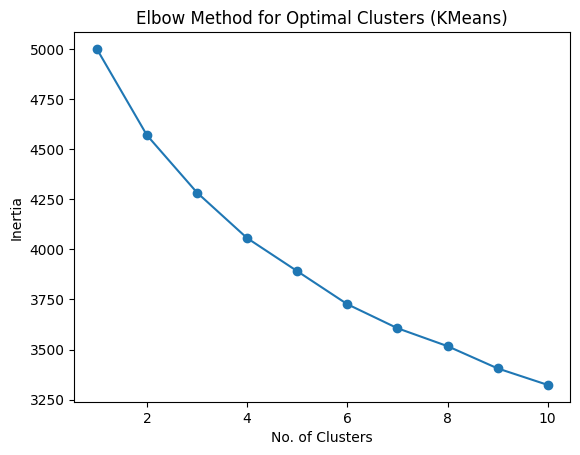

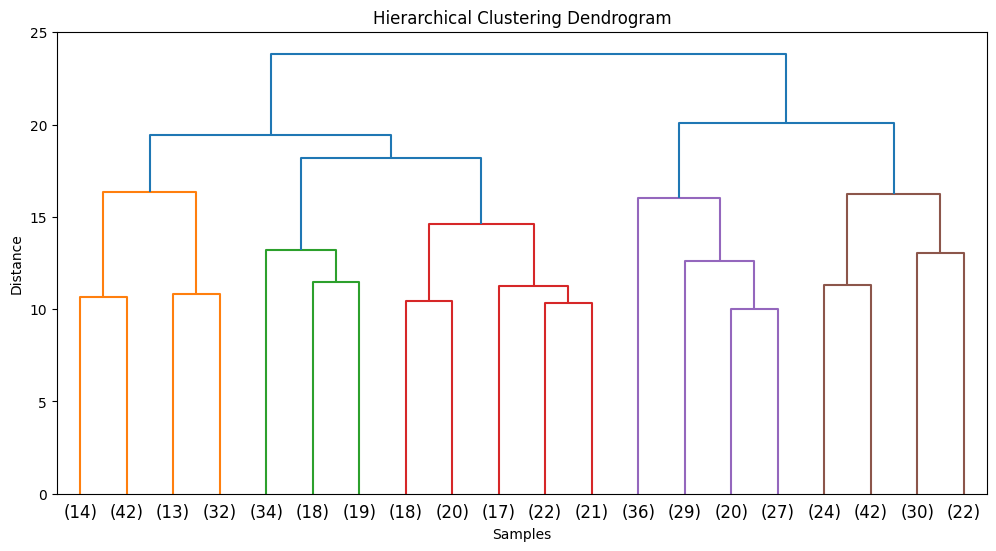

In [76]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Create data
df = pd.DataFrame()
df[0] = np.random.uniform(-10, 10, 500)
df[1] = np.random.uniform(-10, 10, 500)
df[2] = np.random.uniform(-10, 10, 500)
df[3] = np.random.uniform(-10, 10, 500)
df[4] = np.random.uniform(10, 20, 500)
df[5] = np.random.uniform(10, 20, 500)
df[6] = np.random.uniform(10, 20, 500)
df[7] = np.random.uniform(10, 20, 500)
df[8] = np.random.uniform(-100, 100, 500)
df[9] = np.random.uniform(-100, 100, 500)

# Normalize
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# (i) K-Means with elbow method
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters (KMeans)")
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.show()

# (ii) Hierarchical Clustering dendrogram
linked = linkage(data_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


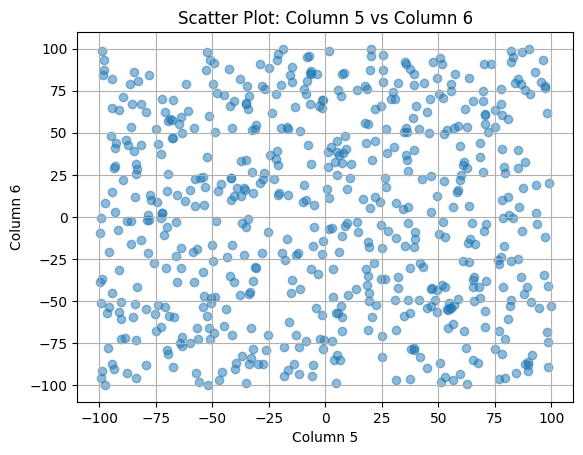

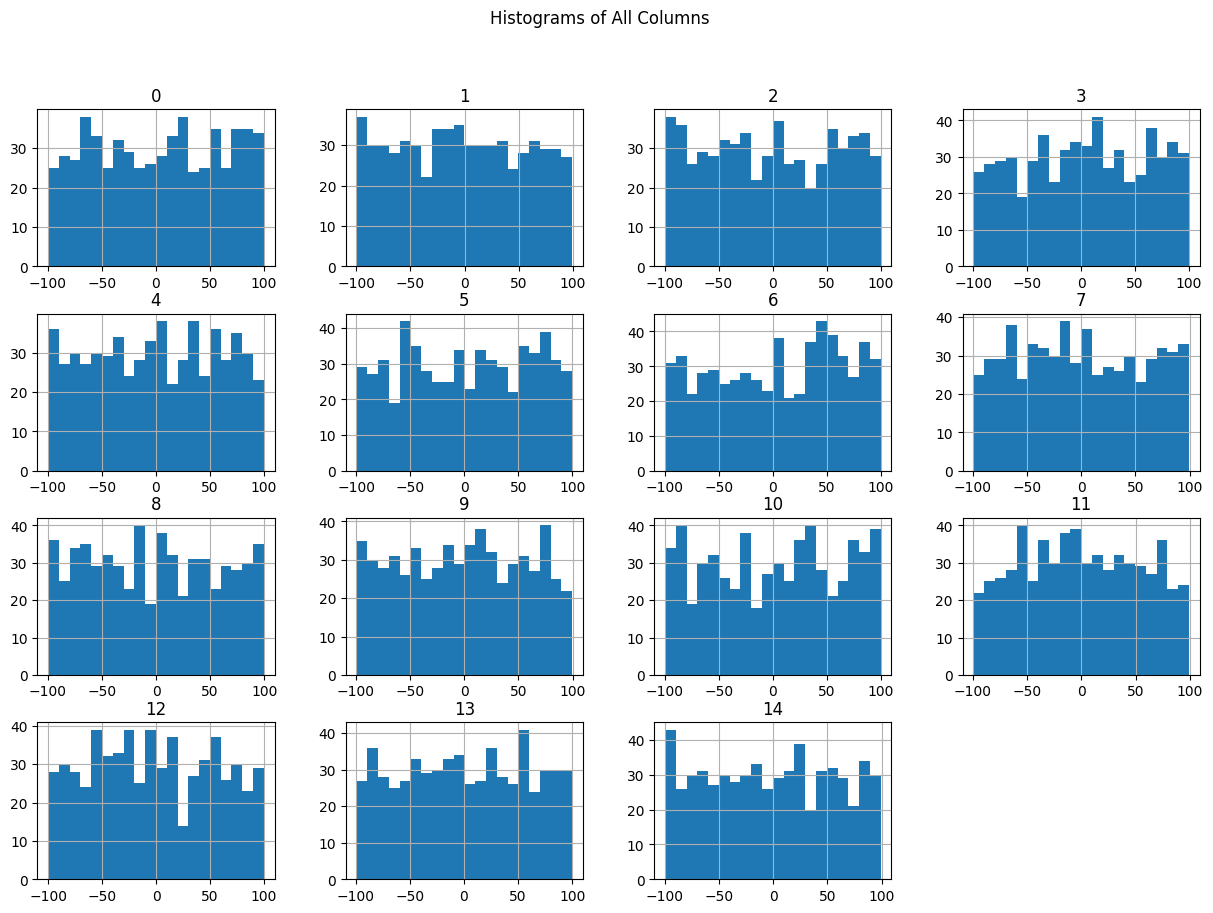

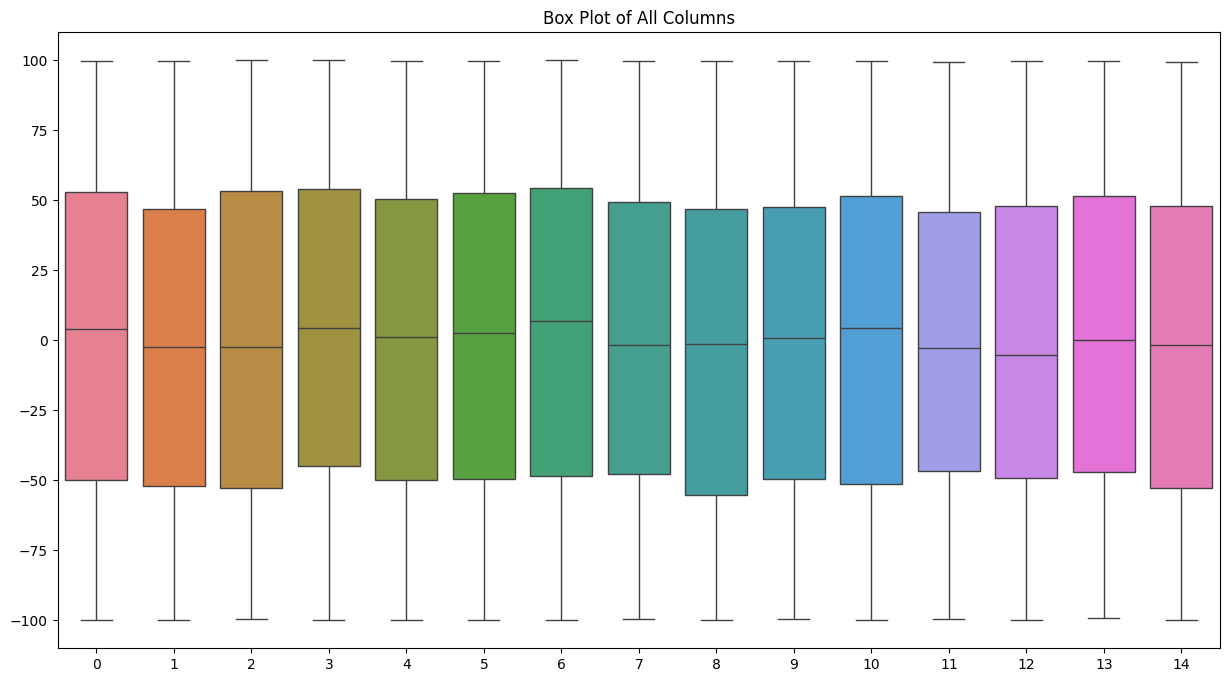

In [77]:
df = pd.DataFrame(np.random.uniform(-100, 100, (600, 15)))

# (i) Scatter plot (Col 5 vs Col 6)
plt.scatter(df[4], df[5], alpha=0.5)
plt.title("Scatter Plot: Column 5 vs Column 6")
plt.xlabel("Column 5")
plt.ylabel("Column 6")
plt.grid(True)
plt.show()

# (ii) Histograms
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of All Columns")
plt.show()

# (iii) Box Plots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Box Plot of All Columns")
plt.show()


In [78]:
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, ranksums

df = pd.DataFrame(np.random.uniform(5, 10, (500, 5)))

# (i) One-sample t-Test (test mean != 7.5)
print("One-sample t-Test:")
for i in range(5):
    t_stat, p_val = ttest_1samp(df[i], popmean=7.5)
    print(f"Col {i+1}: t = {t_stat:.3f}, p = {p_val:.3f}")

# (ii) Wilcoxon signed-rank test (against 7.5)
print("\nWilcoxon signed-rank test:")
for i in range(5):
    try:
        stat, p_val = wilcoxon(df[i] - 7.5)
        print(f"Col {i+1}: stat = {stat:.3f}, p = {p_val:.3f}")
    except:
        print(f"Col {i+1}: Wilcoxon not valid")

# (iii) Two-sample tests: Col 3 vs Col 4
print("\nTwo-sample t-test (Col3 vs Col4):")
t_stat, p_val = ttest_ind(df[2], df[3])
print(f"t = {t_stat:.3f}, p = {p_val:.3f}")

print("\nWilcoxon rank-sum test (Col3 vs Col4):")
stat, p_val = ranksums(df[2], df[3])
print(f"stat = {stat:.3f}, p = {p_val:.3f}")


One-sample t-Test:
Col 1: t = 0.124, p = 0.901
Col 2: t = 0.721, p = 0.471
Col 3: t = 1.155, p = 0.249
Col 4: t = 2.215, p = 0.027
Col 5: t = -0.815, p = 0.415

Wilcoxon signed-rank test:
Col 1: stat = 62122.000, p = 0.876
Col 2: stat = 60435.000, p = 0.498
Col 3: stat = 58851.000, p = 0.243
Col 4: stat = 55496.000, p = 0.027
Col 5: stat = 59969.000, p = 0.411

Two-sample t-test (Col3 vs Col4):
t = -0.755, p = 0.451

Wilcoxon rank-sum test (Col3 vs Col4):
stat = -0.787, p = 0.431
